## Image classifier for the SVHN dataset
### Instructions

In this notebook, I will create a neural network that classifies real-world images digits.

In [1]:
import tensorflow as tf
from scipy.io import loadmat

![SVHN overview image](http://ufldl.stanford.edu/housenumbers/32x32eg.png)
For this project, I will use the [SVHN dataset](http://ufldl.stanford.edu/housenumbers/). This is an  image dataset of over 600,000 digit images in all, and is a harder dataset than MNIST as the numbers appear in the context of natural scene images. SVHN is obtained from house numbers in Google Street View images. 

* Y. Netzer, T. Wang, A. Coates, A. Bissacco, B. Wu and A. Y. Ng. "Reading Digits in Natural Images with Unsupervised Feature Learning". NIPS Workshop on Deep Learning and Unsupervised Feature Learning, 2011.

My goal is to develop an end-to-end workflow for building, training, validating, evaluating and saving a neural network that classifies a real-world image into one of ten classes.

In [ ]:
# Run this cell to load the dataset

train = loadmat('data/train_32x32.mat')
test = loadmat('data/test_32x32.mat')


Both `train` and `test` are dictionaries with keys `X` and `y` for the input images and labels respectively.

## 1. Inspect and preprocess the dataset
* Extract the training and testing images and labels separately from the train and test.
* Select a random sample of images and corresponding labels from the dataset (at least 10), and display them in a figure.
* Convert the training and test images to grayscale by taking the average across all colour channels for each pixel.
* Select a random sample of the grayscale images and corresponding labels from the dataset (at least 10), and display them in a figure.

In [3]:
X_train, y_train, X_test, y_test = train['X'], train['y'] , test['X'], test['y']

In [4]:
X_train.shape

(32, 32, 3, 73257)

In [5]:
import matplotlib.pyplot as plt
import numpy as np

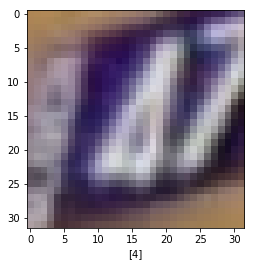

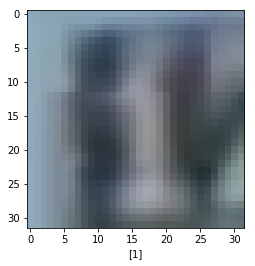

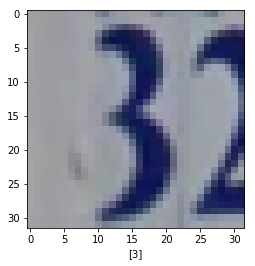

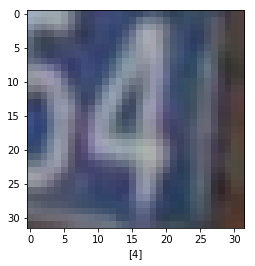

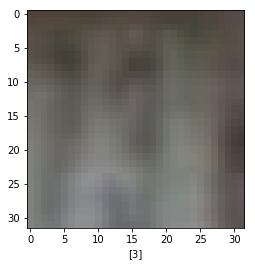

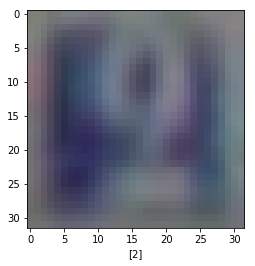

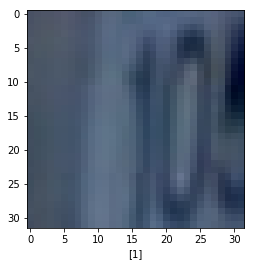

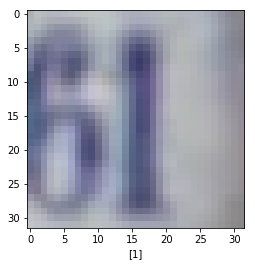

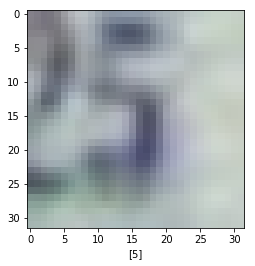

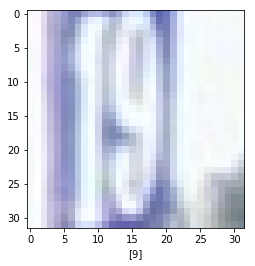

In [6]:
selectIndex = np.random.randint(0, 73257, 10)
for index in selectIndex:
    plt.imshow(X_train[:,:,:,index])
    plt.xlabel(y_train[index])
    plt.show()

In [7]:
X_train_gray = np.apply_over_axes(np.mean, X_train, [2])
X_test_gray = np.apply_over_axes(np.mean, X_test, [2])

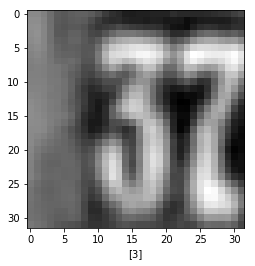

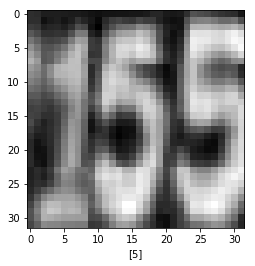

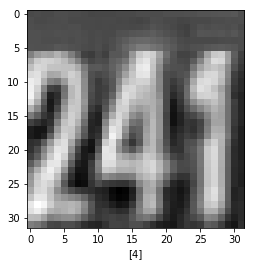

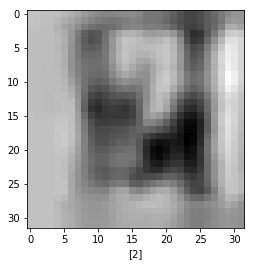

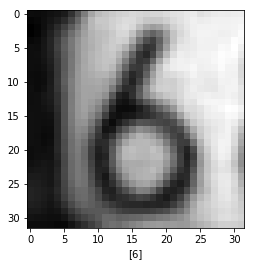

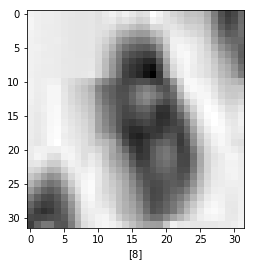

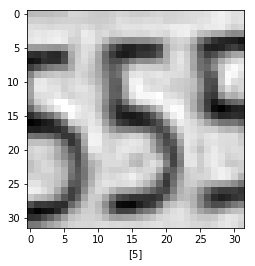

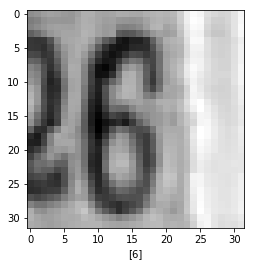

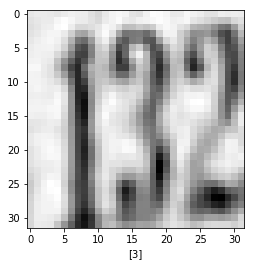

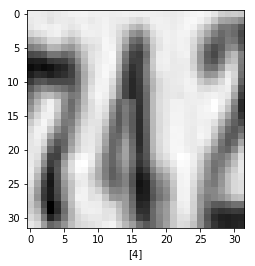

In [8]:
selectIndex = np.random.randint(0, 73257, 10)
for index in selectIndex:
    image = X_train_gray[:,:,:,index].reshape(32,32)
    plt.imshow(image, cmap='gray')
    plt.xlabel(y_train[index])
    plt.show()

## 2. MLP neural network classifier
* Build an MLP classifier model using the Sequential API. For fast training, my model use only Flatten and Dense layers, with the final layer having a 10-way softmax output. 
* Print out the model summary (using the summary() method)
* Compile and train the model (we recommend a maximum of 30 epochs), making use of both training and validation sets during the training run. 
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau

In [20]:
model = Sequential([
    Dense(16, input_shape=(32,32), activation='relu', kernel_initializer=tf.keras.initializers.he_normal()),
    Dense(16, activation='relu'),
    Flatten(),
    Dense(10, activation='softmax')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32, 16)            528       
_________________________________________________________________
dense_4 (Dense)              (None, 32, 16)            272       
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)                5130      
Total params: 5,930
Trainable params: 5,930
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
mpl_checkpoint_path = 'mpl_checkpoint/checkpoint'
mpl_checkpoint = ModelCheckpoint(filepath=mpl_checkpoint_path, save_best_only=True, verbose=False, save_weights_only=True, save_freq='epoch')

In [ ]:
X_train_gray = np.array([X_train_gray[:,:,:,i].reshape(32,32) for i in range(X_train_gray.shape[3])])
X_test_gray = np.array([X_test_gray[:,:,:,i].reshape(32,32) for i in range(X_test_gray.shape[3])])
y_train[y_train==10]=0
y_test[y_test==10]=0

In [23]:
history = model.fit(X_train_gray, y_train, validation_split=.15, batch_size=256, callbacks=[mpl_checkpoint,ReduceLROnPlateau(patience=3)],verbose=2,epochs=30)

Train on 62268 samples, validate on 10989 samples
Epoch 1/30
62268/62268 - 9s - loss: 11.0976 - accuracy: 0.1312 - val_loss: 2.6730 - val_accuracy: 0.1398
Epoch 2/30
62268/62268 - 8s - loss: 2.3577 - accuracy: 0.1823 - val_loss: 2.2725 - val_accuracy: 0.1928
Epoch 3/30
62268/62268 - 8s - loss: 2.2446 - accuracy: 0.1966 - val_loss: 2.2181 - val_accuracy: 0.2027
Epoch 4/30
62268/62268 - 8s - loss: 2.1924 - accuracy: 0.2182 - val_loss: 2.1632 - val_accuracy: 0.2307
Epoch 5/30
62268/62268 - 9s - loss: 2.1473 - accuracy: 0.2422 - val_loss: 2.1327 - val_accuracy: 0.2551
Epoch 6/30
62268/62268 - 8s - loss: 2.1237 - accuracy: 0.2180 - val_loss: 2.1172 - val_accuracy: 0.2112
Epoch 7/30
62268/62268 - 9s - loss: 2.1028 - accuracy: 0.2258 - val_loss: 2.0972 - val_accuracy: 0.2235
Epoch 8/30
62268/62268 - 9s - loss: 2.0820 - accuracy: 0.2370 - val_loss: 2.0793 - val_accuracy: 0.2443
Epoch 9/30
62268/62268 - 9s - loss: 2.0649 - accuracy: 0.2620 - val_loss: 2.0588 - val_accuracy: 0.2968
Epoch 10/30
6

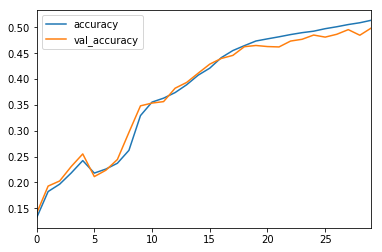

In [24]:
import pandas as pd
df = pd.DataFrame(history.history)
df.plot(y=['accuracy', 'val_accuracy'])

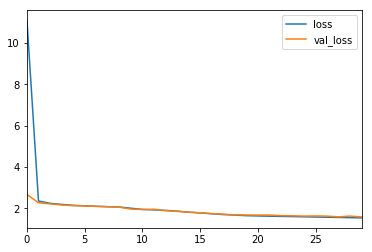

In [25]:
df = pd.DataFrame(history.history)
df.plot(y=['loss', 'val_loss'])

In [26]:
test_loss, test_acc = model.evaluate(x=X_test_gray, y=y_test, verbose=0)
print(f'Loss on test set {test_loss}')
print(f'Accuracy on test set {test_acc}')

Loss on test set 1.6208479956167932
Accuracy on test set 0.501114010810852


## 3. CNN neural network classifier
* Build a CNN classifier model using the Sequential API. I will use the Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense and Dropout layers. The final layer again have a 10-way softmax output. 
* The CNN model should use fewer trainable parameters than your MLP model.
* Compile and train the model, making use of both training and validation sets during the training run.
* Plot the learning curves for loss vs epoch and accuracy vs epoch for both training and validation sets.
* Compute and display the loss and accuracy of the trained model on the test set.

In [27]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, BatchNormalization, Dropout

In [36]:
cnn_model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(32,32,1), kernel_initializer=tf.keras.initializers.he_normal()),
    Dropout(0.3),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(8,(3,3), activation='relu'),
    Dropout(0.3),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(10, activation='softmax')
])
cnn_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 16)        160       
_________________________________________________________________
dropout_4 (Dropout)          (None, 30, 30, 16)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 30, 30, 16)        64        
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 8)         1160      
_________________________________________________________________
dropout_5 (Dropout)          (None, 13, 13, 8)         0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 13, 13, 8)        

In [37]:
cnn_model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(),metrics=['accuracy'])
cnn_checkpoint_path = 'cnn_checkpoint/checkpoint'
cnn_checkpoint = ModelCheckpoint(filepath=cnn_checkpoint_path, save_best_only=True, verbose=False, save_weights_only=True, save_freq='epoch')

In [38]:
cnn_history = cnn_model.fit(X_train_gray.reshape((X_train_gray.shape[0],32,32,1)), y_train, validation_split=.15, batch_size=256, callbacks=[cnn_checkpoint,ReduceLROnPlateau(patience=3)],verbose=2,epochs=30)

Train on 62268 samples, validate on 10989 samples
Epoch 1/30
62268/62268 - 235s - loss: 2.1125 - accuracy: 0.3097 - val_loss: 2.0540 - val_accuracy: 0.2432
Epoch 2/30
62268/62268 - 219s - loss: 1.0773 - accuracy: 0.6662 - val_loss: 1.0918 - val_accuracy: 0.7206
Epoch 3/30
62268/62268 - 219s - loss: 0.8288 - accuracy: 0.7485 - val_loss: 0.8585 - val_accuracy: 0.7833
Epoch 4/30
62268/62268 - 217s - loss: 0.7425 - accuracy: 0.7778 - val_loss: 0.7958 - val_accuracy: 0.7983
Epoch 5/30
62268/62268 - 223s - loss: 0.6987 - accuracy: 0.7913 - val_loss: 0.7690 - val_accuracy: 0.8002
Epoch 6/30
62268/62268 - 227s - loss: 0.6674 - accuracy: 0.7988 - val_loss: 0.7555 - val_accuracy: 0.8137
Epoch 7/30
62268/62268 - 216s - loss: 0.6511 - accuracy: 0.8065 - val_loss: 0.7007 - val_accuracy: 0.8209
Epoch 8/30
62268/62268 - 210s - loss: 0.6362 - accuracy: 0.8095 - val_loss: 0.7006 - val_accuracy: 0.8214
Epoch 9/30
62268/62268 - 212s - loss: 0.6183 - accuracy: 0.8144 - val_loss: 0.7049 - val_accuracy: 0.8

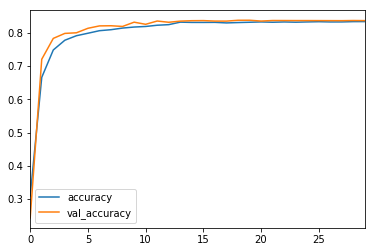

In [39]:
import pandas as pd
df = pd.DataFrame(cnn_history.history)
df.plot(y=['accuracy', 'val_accuracy'])

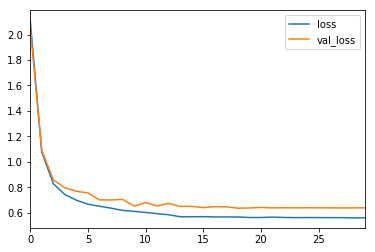

In [40]:
df = pd.DataFrame(cnn_history.history)
df.plot(y=['loss', 'val_loss'])

In [41]:
test_loss, test_acc = cnn_model.evaluate(x=X_test_gray.reshape((X_test_gray.shape[0],32,32,1)), y=y_test, verbose=0)
print(f'Loss on test set {test_loss}')
print(f'Accuracy on test set {test_acc}')

Loss on test set 0.6903449109748016
Accuracy on test set 0.8194530010223389


## 4. Get model predictions
* Load the best weights for the MLP and CNN models that I saved during the training run.
* Randomly select 5 images and corresponding labels from the test set and display the images with their labels.
* Alongside the image and label, show each model’s predictive distribution as a bar chart, and the final model prediction given by the label with maximum probability.

In [54]:
new_mlp  = model
new_mlp.load_weights(mpl_checkpoint_path)
new_cnn = cnn_model
new_cnn.load_weights(cnn_checkpoint_path)

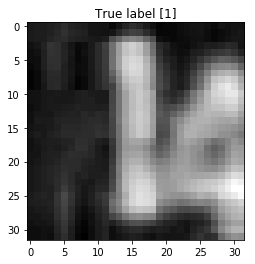

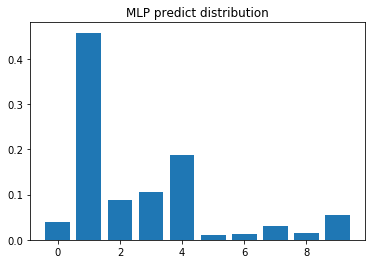

MLP predict: 1


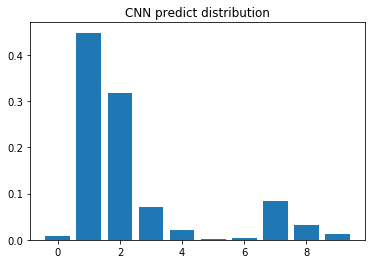

CNN predict: 1


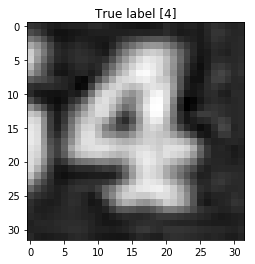

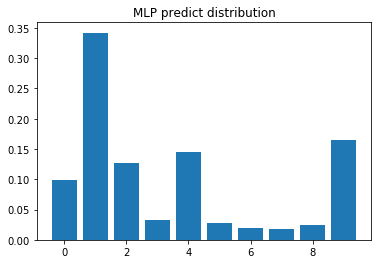

MLP predict: 1


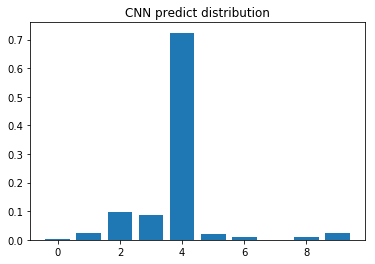

CNN predict: 4


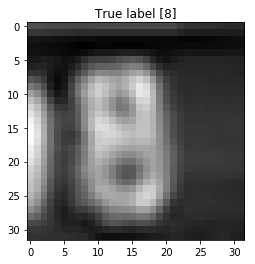

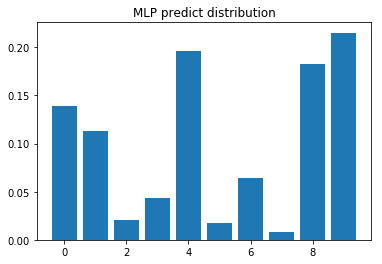

MLP predict: 9


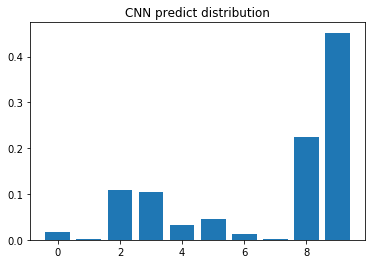

CNN predict: 9


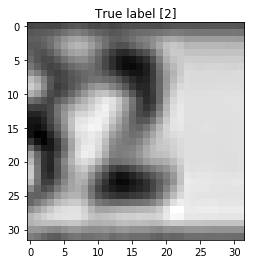

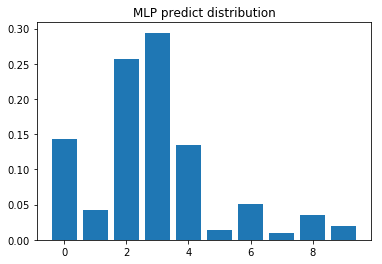

MLP predict: 3


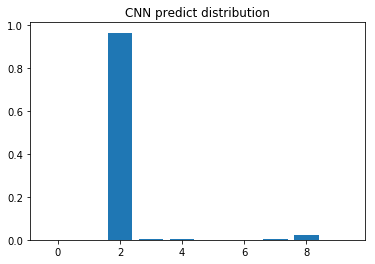

CNN predict: 2


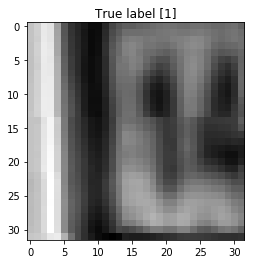

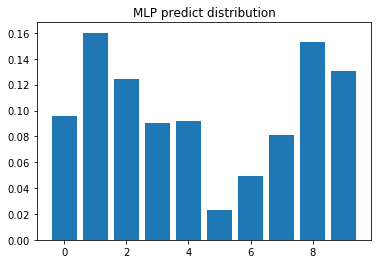

MLP predict: 1


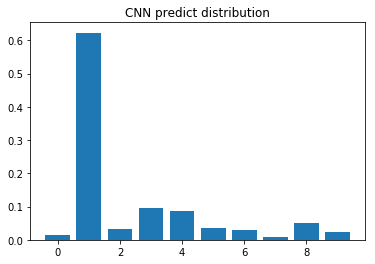

CNN predict: 1


In [69]:
selectIndex = np.random.randint(0, 26032, 5)
for index in selectIndex:
    image = X_test_gray[index]
    plt.imshow(image, cmap='gray')
    plt.title(f'True label {y_test[index]}')
    plt.show()
    mlp_predict = new_mlp.predict(np.array([image]))
    plt.title('MLP predict distribution')
    plt.bar(np.arange(len(mlp_predict[0])),mlp_predict[0])
    plt.show()
    print(f'MLP predict: {np.argmax(mlp_predict[0])}')
    cnn_predict = new_cnn.predict(np.array([image.reshape((32,32,1))]))
    plt.title('CNN predict distribution')
    plt.bar(np.arange(len(cnn_predict[0])),cnn_predict[0])
    plt.show()
    print(f'CNN predict: {np.argmax(cnn_predict[0])}')
    